In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import numpy.ma as ma

In [2]:
result1 = np.zeros((900,580))
result2 = np.zeros((900,220))
i=0

In [3]:
months = [f"{x:02d}" for x in range(7,10)]
#months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,321)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[271:365,600:1180]
        latt = latt[271:365,600:1180]
        plot1 = plotvar[49:,271:365,600:1180]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = plot1.mean(axis=0)
        result1[i,:] = aveplot[:]
        
        i = i + 1

In [4]:
c = np.hstack((result1,result2))

In [5]:
c.shape

(900, 800)

In [6]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0141-07.z_t.nc')
depth = data1.variables['z_t'][:]/100


FileNotFoundError: [Errno 2] No such file or directory: b'/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0141-07.z_t.nc'

In [7]:
A = np.arange(900)
B = np.arange(580)
xx, yy = np.meshgrid(B, A)

In [13]:
nice_cmap=sns.diverging_palette(245, 15, n=30,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,10,20,30,50,60,70,100,110,130,140,150,160,170,180,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'20'}
#nice_levels = [34.65,34.655,34.66,34.662,34.665,34.667,34.67]
nice_levels = [34.62,34.625,34.63,34.635,34.64,34.645,34.65,34.655,34.66,34.665,34.67]
#nice_levels = [34.64,34.642,34.644,34.646,34.648,34.65,34.652,34.654,34.656,34.658,34.66,34.662,34.664,34.666]
#nice_levels = [34.30,34.35,34.4,34.45,34.5,34.55,34.6]
#nice_levels = [34.10,34.18,34.20,34.22,34.24,34.26,34.28,34.30,34.32,34.34,34.36,34.38,34.40,34.42,\
               #34.44,34.46,34.48,34.50,34.52,34.54,34.56,34.58]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  


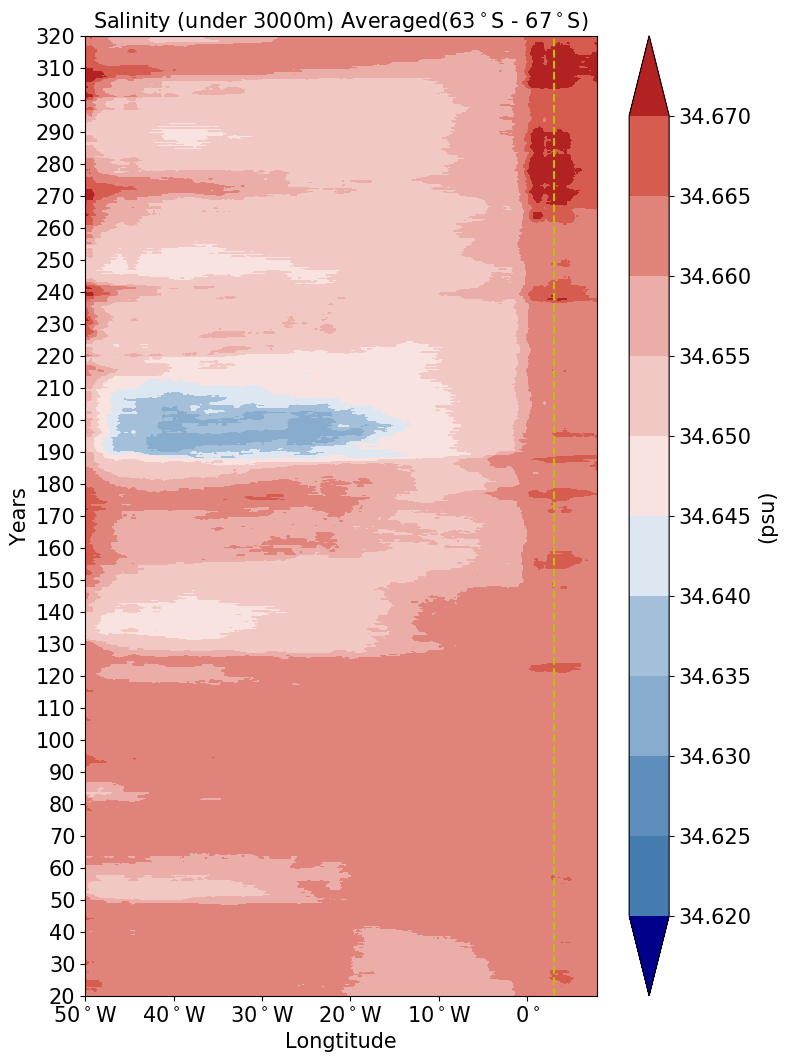

In [16]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'15'}
im = ax0.contourf(xx, yy, result1,cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
plt.vlines(530, 0, 899, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('(psu)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,600,100), ['50$^\circ$W','40$^\circ$W','30$^\circ$W', '20$^\circ$W', '10$^\circ$W', '0$^\circ$'],**my_font)
plt.yticks(range(0,901,30), ['20', '30','40', '50','60','70', '80','90', '100','110','120','130','140','150','160','170',\
                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Salinity (under 3000m) Averaged(63$^\circ$S - 67$^\circ$S)',**my_font)
plt.savefig("salt408m.png")